<a href="https://colab.research.google.com/github/chenboju/LLM/blob/main/12_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD奇異值分解(Singular Value Decomposition)
- 利用分散式表示法來表示字詞，除了之前用統計機率方式計算的PMI之外，還可以利用矩陣方式計算的SVD
- SVD是透過矩陣的奇異值分解成U、S、V三個矩陣，來找出字詞之間的高維隱含關係(U、S、V各代表字詞不同的隱含關係)
- 本範例是計算PMI範例並進行SVD分解，然後畫出字詞U矩陣，讓同學了解字詞之間的關係

In [15]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-12-27 05:09:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.218.113, 172.217.218.100, 172.217.218.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l458jqgmvpsg28o5cb9jo1q6draae0ru/1703653725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b67c3299-6150-4105-824d-b39a806d22de [following]
--2023-12-27 05:09:38--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l458jqgmvpsg28o5cb9jo1q6draae0ru/1703653725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b67c3299-6150-4105-824d-b39a806d22de
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to d

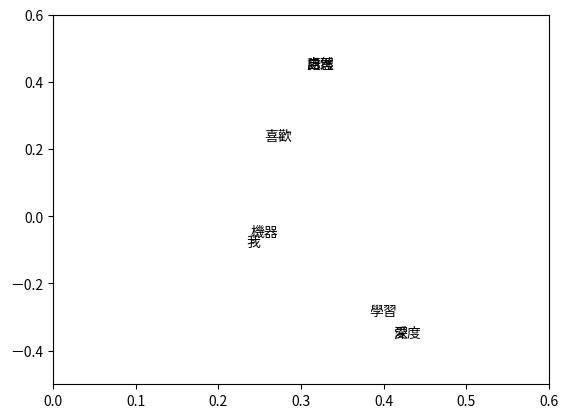

In [16]:

import numpy as np

# 定義一個矩陣M，這是一個詞彙之間的關聯矩陣
M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

# 定義PMI計算函數
def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # 壓制有關log(0)的令人分心的警告：
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

# 對矩陣M應用PMI轉換
M_pmi = pmi(M)

# 設定打印精度
np.set_printoptions(precision=2)

# 對PMI轉換後的矩陣進行奇異值分解（SVD）
U, s, Vh = np.linalg.svd(M_pmi)

# 導入matplotlib進行數據可視化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 要顯示的詞彙
words = ["我", "喜歡", "自然", "語言", "處理", "愛", "深度", "學習", "機器", "。"]

# 在2D空間中基於前兩個奇異向量（U矩陣）繪製詞彙
for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])
plt.xlim(0, 0.6)
plt.ylim(-0.5, 0.6)

# 顯示繪圖
plt.show()
